In [ ]:
import numpy as np
from utilities import *
from imbalance_gain import *
import matplotlib.pyplot as plt
import pickle

In [2]:
trajectory = pickle.load(open("data/test_trajectory.p", "rb"))
traj_length = trajectory.shape[0]
print(f"Number of time points: {trajectory.shape[0]}")
print(f"Number of components: {trajectory.shape[1]}") # first component is time

Number of time points: 105001
Number of components: 7


In [3]:
print(trajectory)

[[ 7.85000000e-02  5.78655544e+00  1.83792928e+01 ...  6.96704824e+00
   2.30848403e+01  3.61692603e+01]
 [ 3.92500000e-01 -5.43153741e+00  1.89596533e+01 ... -5.30617528e+00
   2.41765680e+01  1.52564725e+00]
 [ 7.06500000e-01 -1.13235937e+01  1.71226226e+01 ... -1.28534715e+01
   2.23619424e+01  1.28872587e-02]
 ...
 [ 3.29694505e+04 -4.71985919e-02  8.99891368e+00 ... -7.22878191e-01
   5.97451330e+00  1.10798739e-01]
 [ 3.29697645e+04 -2.95895910e+00  8.94385926e+00 ... -2.60972017e+00
   5.71954211e+00  1.88686856e-02]
 [ 3.29700785e+04 -5.68211145e+00  7.96014038e+00 ... -4.35015348e+00
   4.85554317e+00  1.43650407e-02]]


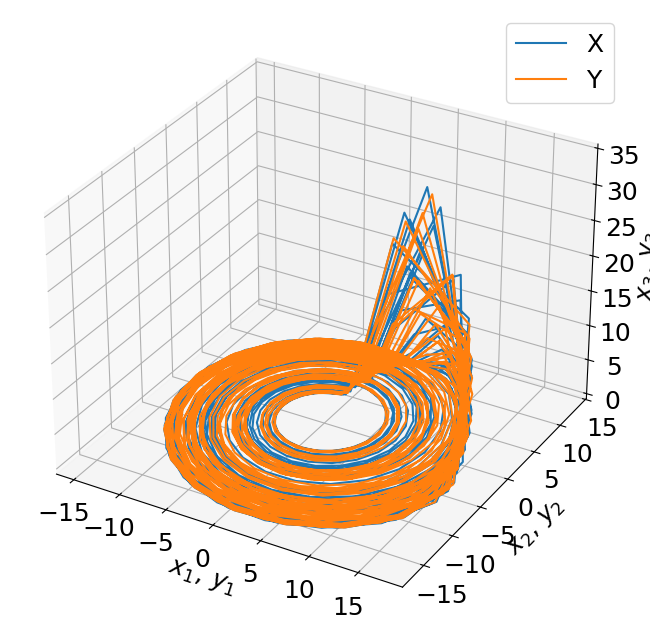

In [4]:
plt.rcParams['font.size'] = 18
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

start_plot = 1000
end_plot = 2000

x_1 = trajectory[start_plot:end_plot,1]
x_2 = trajectory[start_plot:end_plot,2]
x_3 = trajectory[start_plot:end_plot,3]
y_1 = trajectory[start_plot:end_plot,4]
y_2 = trajectory[start_plot:end_plot,5]
y_3 = trajectory[start_plot:end_plot,6]

ax.plot3D(x_1, x_2, x_3, label="X")
ax.plot3D(y_1, y_2, y_3, label="Y")

ax.set_xlabel("$x_1,\,y_1$")
ax.set_ylabel("$x_2,\,y_2$")
ax.set_zlabel("$x_3,\,y_3$")

ax.legend()
plt.show()

In [5]:
tau = 20
N = 2500
sample_times = np.linspace(1000,traj_length-tau-1,N,dtype=int)
k = 5
alphas = np.linspace(0,1,50)
n_jobs = 4 #parallelize the calculation for different alphas

In [6]:
X0 = trajectory[sample_times,1:4]
Y0 = trajectory[sample_times,4:]
rank_matrix_Xtau = compute_rank_matrix(trajectory[sample_times + tau,1:4])
rank_matrix_Ytau = compute_rank_matrix(trajectory[sample_times + tau,4:])

info_imbalances_X_to_Y = scan_alphas(cause_present=X0, effect_present=Y0, rank_matrix_effect_future=rank_matrix_Ytau, 
                                     alphas=alphas, k=k, n_jobs=n_jobs, metric="euclidean")
info_imbalances_Y_to_X = scan_alphas(cause_present=Y0, effect_present=X0, rank_matrix_effect_future=rank_matrix_Xtau, 
                                     alphas=alphas, k=k, n_jobs=n_jobs, metric="euclidean")

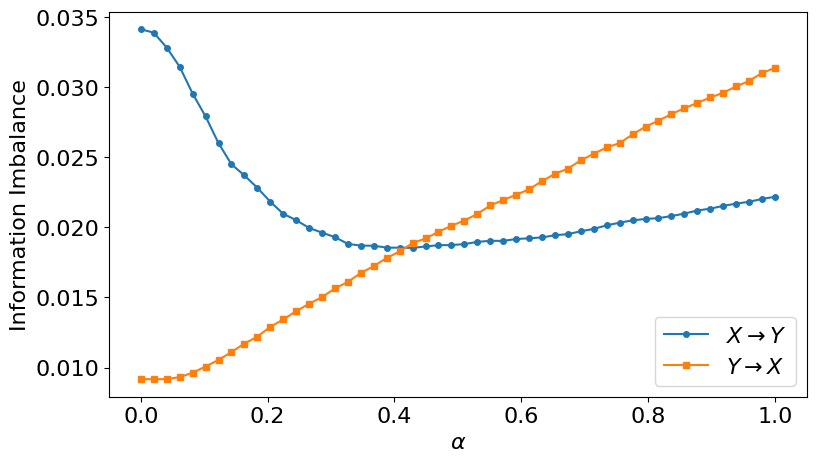

In [7]:
plt.rcParams['font.size'] = 16

plt.figure(figsize=(9,5))
plt.plot(alphas, info_imbalances_X_to_Y, 'o-', markersize=4, label="$X\\rightarrow Y$")
plt.plot(alphas, info_imbalances_Y_to_X, 's-', markersize=4, label="$Y\\rightarrow X$")
plt.xlabel("$\\alpha$")
plt.ylabel("Information Imbalance")
plt.legend()
plt.show()